###Carregando Bibliotecas

In [1]:
import matplotlib.pyplot as plt

from keras.models import Sequential, load_model

from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model

import numpy as np
import pandas as pd

from keras.callbacks import ModelCheckpoint

###Carregando dataset

In [2]:
!rm -rf fruits-360/

In [3]:
!git clone https://github.com/MicaelCosta/fruits-360.git

Cloning into 'fruits-360'...
remote: Enumerating objects: 9666, done.
remote: Total 9666 (delta 0), reused 0 (delta 0), pack-reused 9666
Receiving objects: 100% (9666/9666), 41.68 MiB | 22.52 MiB/s, done.


###Pré-processamento

In [4]:
shape_images = (100, 100)

In [5]:
train_datagen = ImageDataGenerator(validation_split=0.30)

train_generator = train_datagen.flow_from_directory(
    'fruits-360/fruits-15/train',
    batch_size=200,
    color_mode="grayscale",
    subset="training",
    target_size=shape_images)

Found 5054 images belonging to 15 classes.


In [6]:
val_generator = train_datagen.flow_from_directory(
    'fruits-360/fruits-15/test',
    batch_size=200,
    color_mode="grayscale",
    subset="validation",
    target_size=shape_images)

Found 718 images belonging to 15 classes.


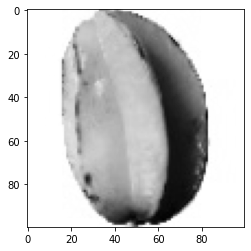

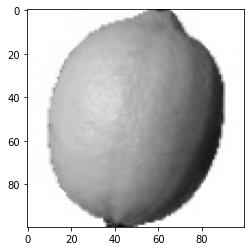

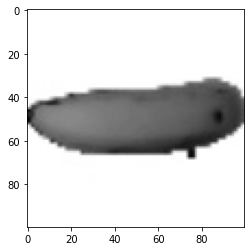

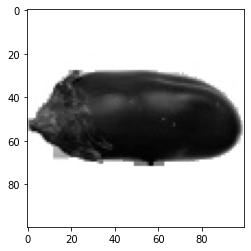

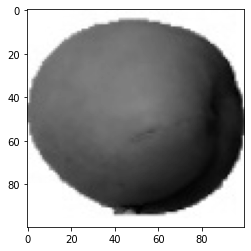

In [7]:
x,y = train_generator.next()
for i in range(0,5):
  image = x[i]
  plt.imshow(image[:,:,0], cmap=plt.get_cmap('gray'))
  plt.show()

In [8]:
x.shape

(200, 100, 100, 1)

In [9]:
train_generator.class_indices, val_generator.class_indices

({'Apricot': 0,
  'Avocado': 1,
  'Banana': 2,
  'Blueberry': 3,
  'Carambula': 4,
  'Cocos': 5,
  'Eggplant': 6,
  'Kiwi': 7,
  'Lemon': 8,
  'Lychee': 9,
  'Orange': 10,
  'Pear': 11,
  'Physalis': 12,
  'Raspberry': 13,
  'Strawberry': 14},
 {'Apricot': 0,
  'Avocado': 1,
  'Banana': 2,
  'Blueberry': 3,
  'Carambula': 4,
  'Cocos': 5,
  'Eggplant': 6,
  'Kiwi': 7,
  'Lemon': 8,
  'Lychee': 9,
  'Orange': 10,
  'Pear': 11,
  'Physalis': 12,
  'Raspberry': 13,
  'Strawberry': 14})

###Modelo CNN

In [10]:
num_classes = 15

STEP_SIZE_TRAIN = train_generator.n // train_generator.batch_size
STEP_SIZE_VALID = val_generator.n // val_generator.batch_size

In [18]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=(100, 100, 1)))
model.add(Conv2D(filters=64, kernel_size=3,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2,  activation='relu'))
model.add(Conv2D(filters=256, kernel_size=2,  activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(num_classes, activation='softmax'))

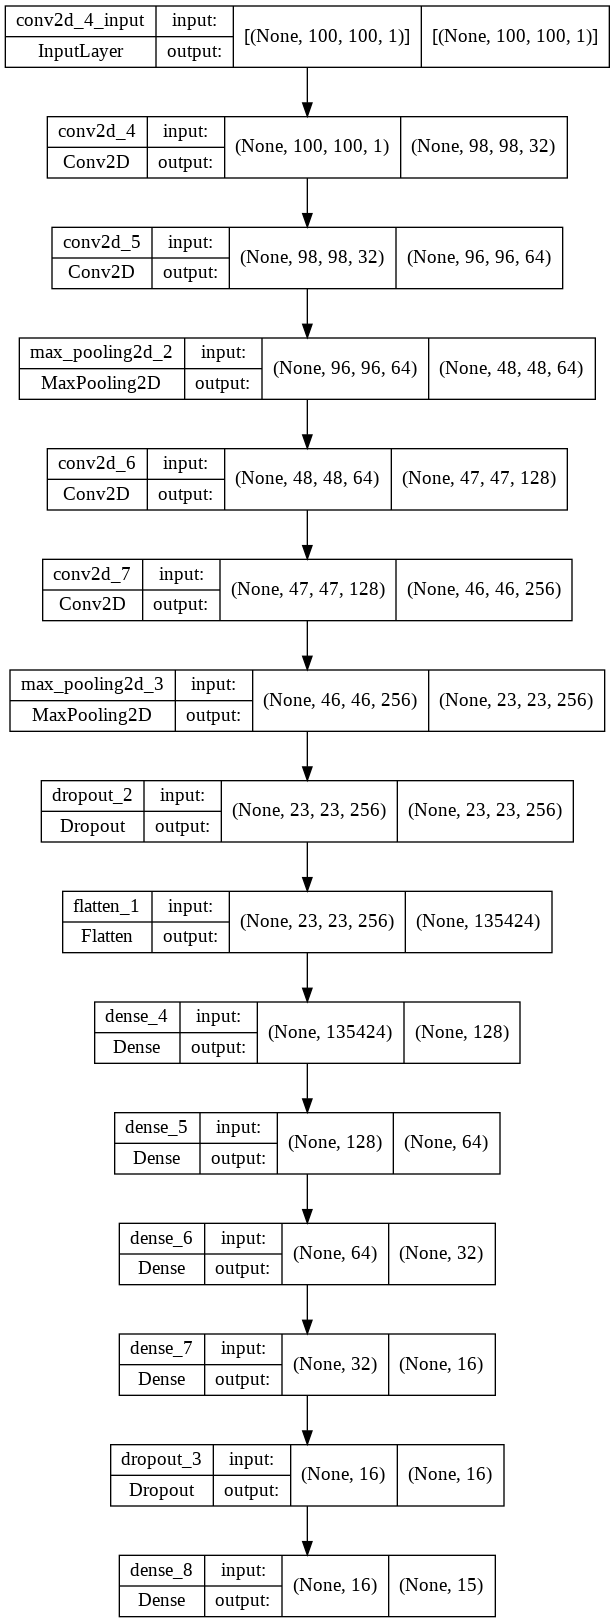

In [19]:
plot_model(model, to_file='cnn-fruits.png', show_shapes=True, show_layer_names=True)

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [21]:
checkpointer = ModelCheckpoint(filepath='cnn-fruits.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=val_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20,
                    callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 21.4923 - accuracy: 0.1044
Epoch 1: val_accuracy improved from -inf to 0.19333, saving model to cnn-fruits.hdf5
25/25 [==============================] - 8s 307ms/step - loss: 21.4923 - accuracy: 0.1044 - val_loss: 2.3086 - val_accuracy: 0.1933
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 1.9773 - accuracy: 0.3070
Epoch 2: val_accuracy improved from 0.19333 to 0.41667, saving model to cnn-fruits.hdf5
25/25 [==============================] - 8s 296ms/step - loss: 1.9773 - accuracy: 0.3070 - val_loss: 1.6197 - val_accuracy: 0.4167
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 1.5375 - accuracy: 0.4448
Epoch 3: val_accuracy improved from 0.41667 to 0.63167, saving model to cnn-fruits.hdf5
25/25 [==============================] - 8s 298ms/step - loss: 1.5375 - accuracy: 0.4448 - val_loss: 1.3526 - val_accuracy: 0.6317
Epoch 4/20
25/25 [==============================] - ETA: 0s - 

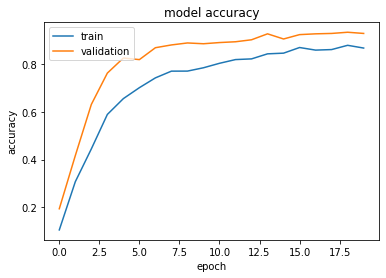

In [22]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    'fruits-360/fruits-15/test',
    batch_size=1,
    color_mode="grayscale",
    target_size=shape_images)

Found 2419 images belonging to 15 classes.


In [24]:
scores = model.evaluate_generator(test_generator)
print('\n', 'Test accuracy:', scores[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.



 Test accuracy: 0.8772220015525818
